In [1]:
!gdown 10aC5r2tCgbB8vXDXABchIXmJbTqC6rmB

Downloading...
From: https://drive.google.com/uc?id=10aC5r2tCgbB8vXDXABchIXmJbTqC6rmB
To: /content/properties.csv
100% 7.52M/7.52M [00:00<00:00, 29.4MB/s]


## Question 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
properties = pd.read_csv("properties.csv")

<ipython-input-3-61d45e767d5a>:1: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  properties = pd.read_csv("properties.csv")


In [4]:
properties.head()

,ID,Possession Status,Availability Starts From,Floor No,Commercial,Developer,Approved Authority Name,Units Available,Price,Price (English),...,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Possession By,NRI Pref,Land Area / Covered Area,Land Area Unit,Pantry Type
0,12685,Under Construction,Dec '25,5,N,NaN,KDMC,1.0,3150000.0,31.5 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
1,12684,Ready to Move,NaN,20,Y,TATA Housing Development Company Ltd.,TMC,10.0,6300000.0,63 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
2,12683,Ready to Move,NaN,18,N,Sai Satyam Developers,KDMC,0.0,5400000.0,54 Lac,...,1,1,1,1,1,NaN,Y,NaN,NaN,NaN
3,12682,Under Construction,Dec '25,5,N,Birla Estates,KDMC,70.0,9000000.0,90 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
4,12681,Under Construction,Dec '24,8,Y,Godrej Properties,NaN,NaN,4950000.0,49.5 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN


In [5]:
col = properties.columns.to_list()

In [8]:
prop_cp = properties.copy()

In [11]:
prop_df = prop_cp.loc[:,['Price','City']]
prop_df_cleaned = prop_df.dropna()

In [16]:
def categorize_price(price, low, medium):
    if price < low:
        return 'Low'
    elif low <= price < medium:
        return 'Medium'
    else:
        return 'High'

In [17]:
unique_prices = prop_df_cleaned['Price'].unique()
low_threshold = np.median(unique_prices)
medium_threshold = low_threshold*2

In [18]:
prop_df_cleaned['Price Range'] = prop_df_cleaned['Price'].apply(lambda p: categorize_price(p, low_threshold, medium_threshold))

distribution = prop_df_cleaned.groupby(['City', 'Price Range']).size().unstack(fill_value=0)

<ipython-input-18-c22166960fc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop_df_cleaned['Price Range'] = prop_df_cleaned['Price'].apply(lambda p: categorize_price(p, low_threshold, medium_threshold))


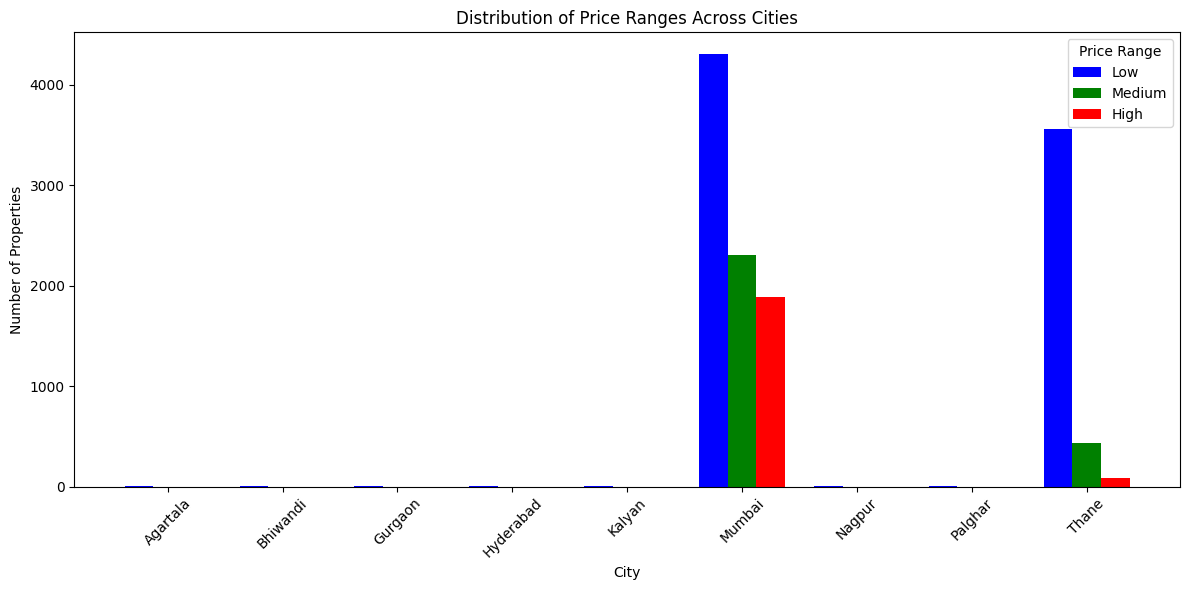

In [19]:
cities = distribution.index
x = np.arange(len(cities))

bar_width = 0.25

plt.figure(figsize=(12, 6))

plt.bar(x - bar_width, distribution['Low'], width=bar_width, color='blue', label='Low')
plt.bar(x, distribution['Medium'], width=bar_width, color='green', label='Medium')
plt.bar(x + bar_width, distribution['High'], width=bar_width, color='red', label='High')

plt.xlabel('City')
plt.ylabel('Number of Properties')
plt.title('Distribution of Price Ranges Across Cities')
plt.xticks(x, cities, rotation=45)
plt.legend(title='Price Range')

plt.tight_layout()
plt.show()

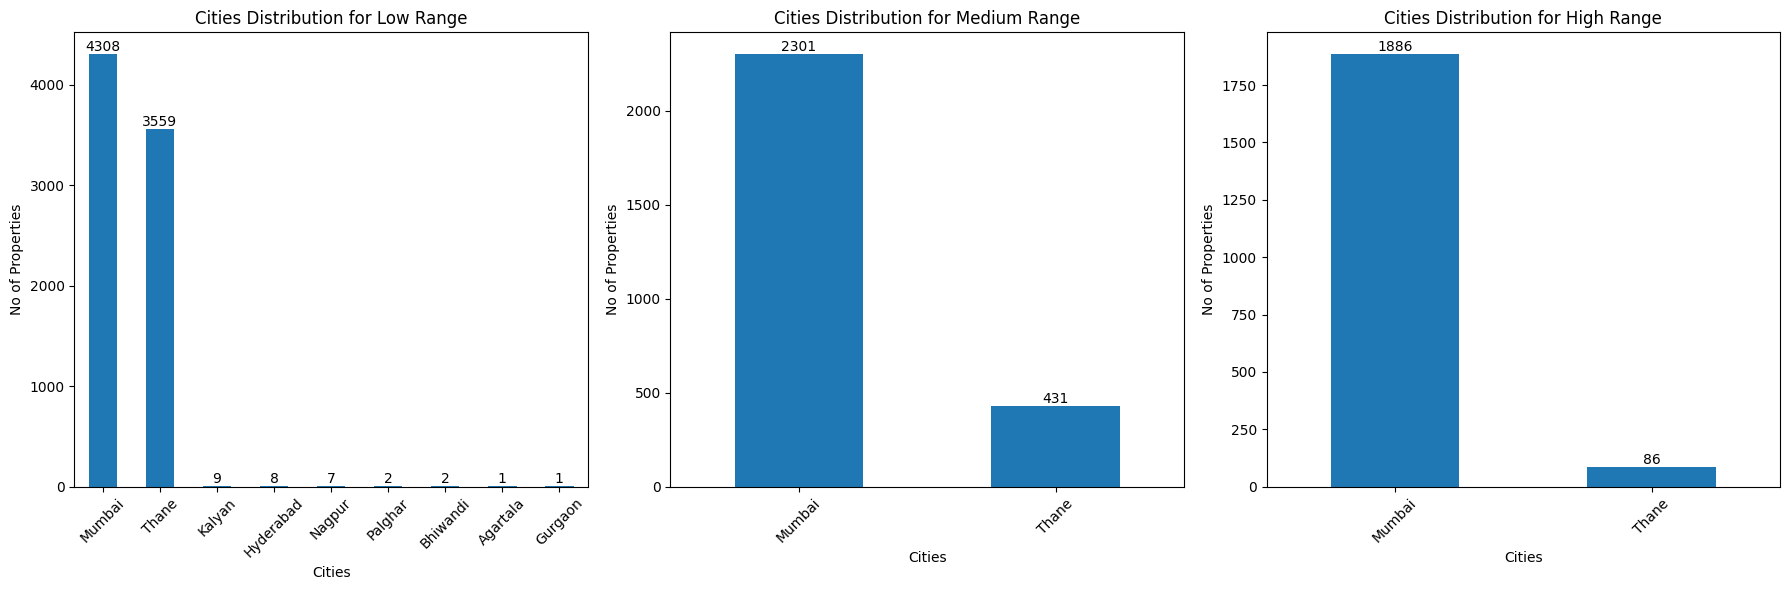

In [20]:
def plot_bar_chart_for_range(ax, df, category):
    category_df = df[df['Price Range'] == category]
    category_counts = category_df['City'].value_counts()

    category_counts.plot(kind='bar', ax=ax)
    for i, count in enumerate(category_counts):
        ax.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

    ax.set_title(f'Cities Distribution for {category} Range')
    ax.set_xlabel('Cities')
    ax.set_ylabel('No of Properties')
    ax.set_xticks(range(len(category_counts)))
    ax.set_xticklabels(category_counts.index, rotation=45)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, category in enumerate(['Low', 'Medium', 'High']):
    plot_bar_chart_for_range(axs[i], prop_df_cleaned, category)

plt.tight_layout()
plt.show()

**Insights**
1. Low range is defined as (0, median); Medium range as (median,2\*median) and High range as (2*median,inf)
2. No other cities are shown in medium range, indicating that Mumbai and Thane are the primary locations for medium-range properties
3. No other cities appear in high range, indicating that high-range properties are almost exclusively found in Mumbai, with Thane having a minor presence.
4. Mumbai consistently has the highest number of properties across all price ranges, indicating its dominance in the real estate market across different price categories.



## Question 3

In [21]:
prop_df = prop_cp.loc[:,['Commercial','Price','City','Property','Type of Property','Carpet Area']]
prop_df_filtered = prop_df[prop_df['City'].isin(['Thane', 'Mumbai'])]

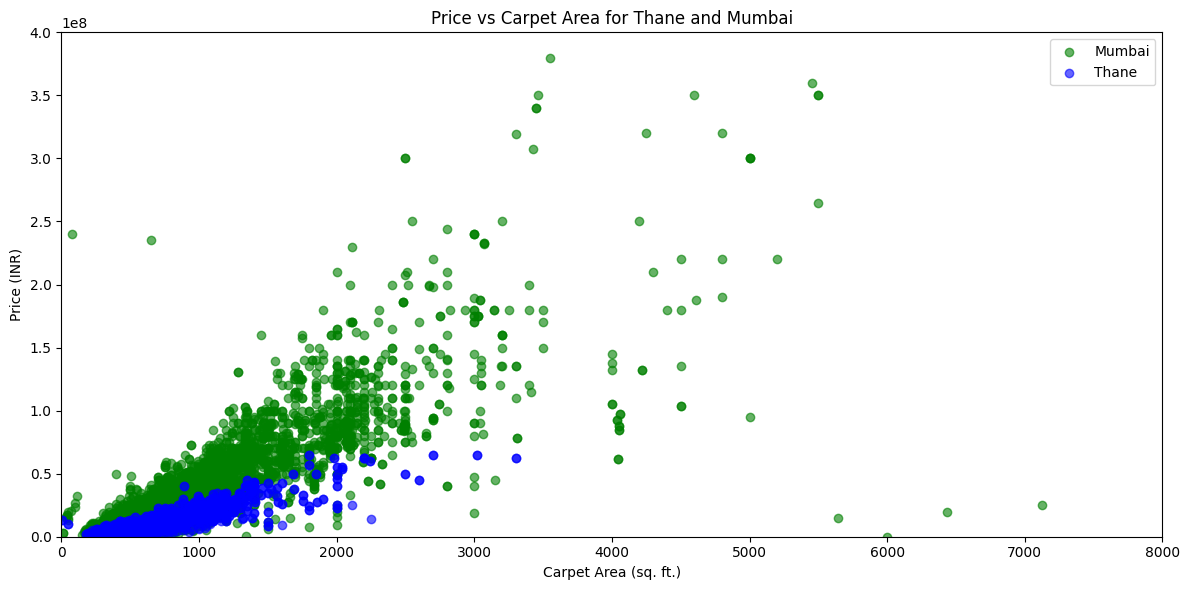

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))

prop_df_mumbai = prop_df_filtered[prop_df_filtered['City'] == 'Mumbai']
ax.scatter(prop_df_mumbai['Carpet Area'], prop_df_mumbai['Price'], alpha=0.6, c='green', label='Mumbai')

prop_df_thane = prop_df_filtered[prop_df_filtered['City'] == 'Thane']
ax.scatter(prop_df_thane['Carpet Area'], prop_df_thane['Price'], alpha=0.6, c='blue', label='Thane')

ax.set_title('Price vs Carpet Area for Thane and Mumbai')
ax.set_xlabel('Carpet Area (sq. ft.)')
ax.set_ylabel('Price (INR)')
ax.set_xlim([0,8000])
ax.set_ylim([0,400000000])
ax.legend()

plt.tight_layout()
plt.show()

**Insights**
1. Mumbai (represented by green dots) shows a wider distribution across both smaller and larger carpet areas.
2. Thane (represented by blue dots) tends to have properties with smaller carpet areas compared to Mumbai.
3. There seems to be a positive correlation between carpet area and price in both cities, though the relationship appears more dispersed in Mumbai, indicating a wider variety in property types and prices.

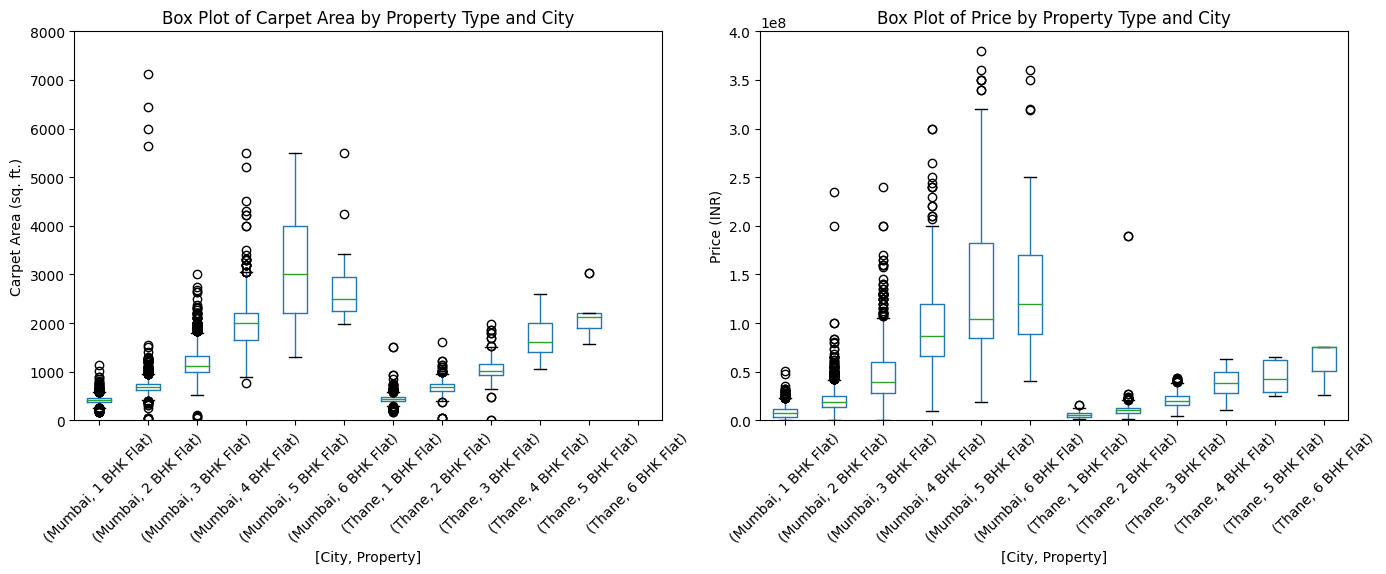

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

prop_df_filtered.boxplot(column='Carpet Area', by=['City', 'Property'], ax=ax[0], grid=False)
ax[0].set_title('Box Plot of Carpet Area by Property Type and City')
ax[0].set_ylabel('Carpet Area (sq. ft.)')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_ylim([0,8000])

prop_df_filtered.boxplot(column='Price', by=['City', 'Property'], ax=ax[1], grid=False)
ax[1].set_title('Box Plot of Price by Property Type and City')
ax[1].set_ylabel('Price (INR)')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_ylim([0,400000000])

plt.suptitle('')
plt.tight_layout()
plt.show()

**Insights**
1. Mumbai dominates both in terms of carpet area and price, offering a wider variety of properties, including many high-end, large-area properties.
2. Thane has a more limited range of property sizes and prices, typically lower than in Mumbai, making it a more affordable alternative.
3. The data suggest that the luxury market (larger BHKs with high prices) is primarily concentrated in Mumbai, with fewer such options available in Thane.

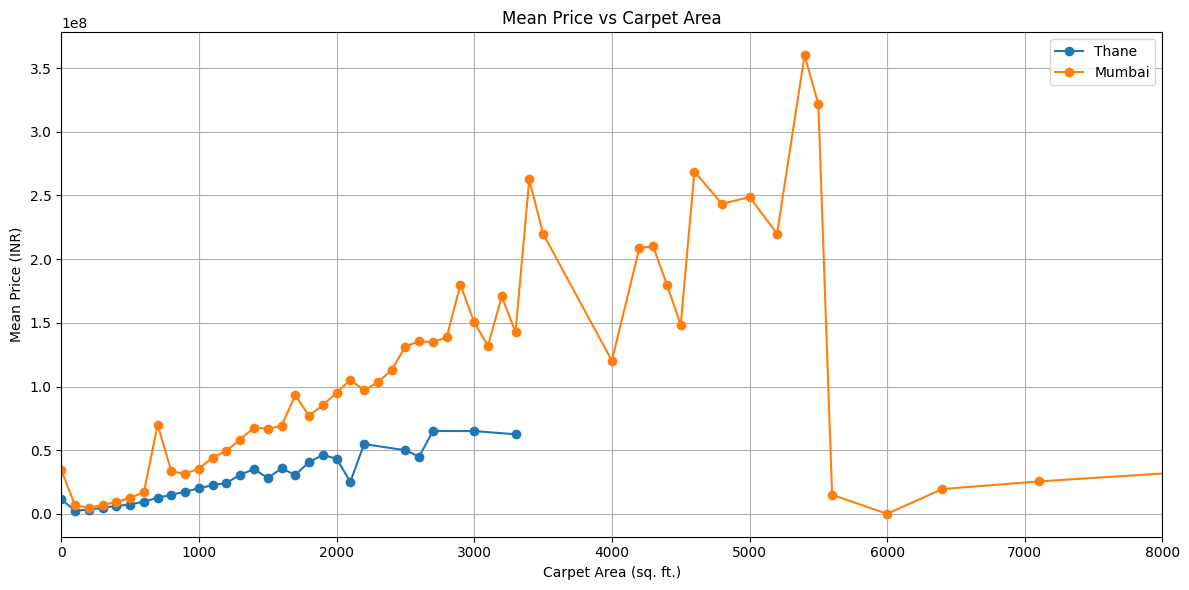

In [24]:
prop_df_b = prop_df_filtered.copy()
prop_df_b['Carpet Area Bin'] = (prop_df_b['Carpet Area'] // 100) * 100

mean_price_by_area = prop_df_b.groupby(['City', 'Carpet Area Bin']).agg({'Price': 'mean'}).reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

for city in ['Thane', 'Mumbai']:
    subset = mean_price_by_area[mean_price_by_area['City'] == city]
    ax.plot(subset['Carpet Area Bin'], subset['Price'], marker='o', label=city)

ax.set_title('Mean Price vs Carpet Area')
ax.set_xlabel('Carpet Area (sq. ft.)')
ax.set_ylabel('Mean Price (INR)')
ax.legend()
ax.set_xlim([0,8000])

plt.grid(True)
plt.tight_layout()
plt.show()

**Insights**
1. The mean price in Mumbai increases more steeply with the increase in carpet area. There are some sharp increases and fluctuations, especially in larger carpet areas, indicating that premium properties in Mumbai command very high prices.
2. The mean price in Thane increases more gradually and steadily with carpet area. Thane's property prices remain much lower compared to Mumbai for similar carpet areas.
3. As the carpet area increases, the price disparity between Thane and Mumbai widens, highlighting the premium pricing associated with larger properties in Mumbai.

## Question 8

In [25]:
prop_df = prop_cp.loc[:,['Possession Status','Price','City']]

In [26]:
from datetime import datetime

prop_df = prop_df.dropna()
prop_df['Possession Status'] = prop_df['Possession Status'].replace('Immediately', 'Ready to Move')

In [27]:
def categorize_possession(status):
    if pd.isna(status):
        return 'Unknown'
    elif status in ['Under Construction', 'Ready to Move']:
        return status
    else:
        try:
            date = pd.to_datetime(status, format="%b '%y")
            if date <= datetime.now():
                return 'Ready to Move'
            else:
                return str(date.year)
        except:
            return 'Unknown'

In [28]:
prop_df['Possession Status'] = prop_df['Possession Status'].apply(categorize_possession)

<Figure size 1200x600 with 0 Axes>

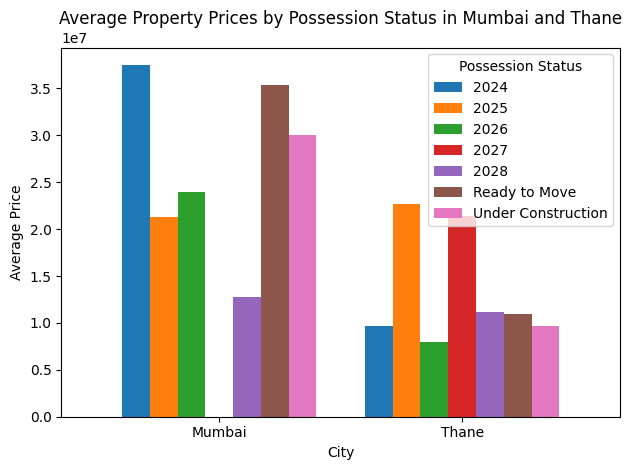

In [29]:
cities = ['Mumbai', 'Thane']
df_filtered = prop_df[prop_df['City'].isin(cities)]

# Grouped Bar Chart
avg_prices = df_filtered.groupby(['City', 'Possession Status'])['Price'].mean().unstack()

plt.figure(figsize=(12, 6))
avg_prices.plot(kind='bar', width=0.8)
plt.title('Average Property Prices by Possession Status in Mumbai and Thane')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.legend(title='Possession Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

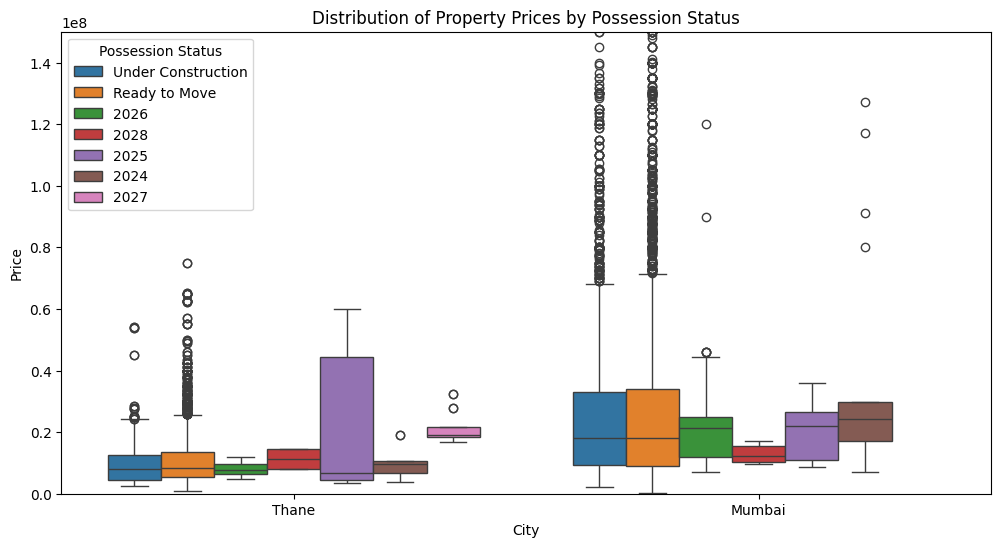

In [30]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Price', hue='Possession Status', data=df_filtered)
plt.title('Distribution of Property Prices by Possession Status')
plt.ylabel('Price')
plt.ylim([0,150000000])
plt.show()

**Insights**
1. Ready-to-move properties in Mumbai have higher average prices compared to under-construction ones. This is clear in both the bar plot and the box plot, where ready-to-move properties show higher average prices and a wider distribution of prices, particularly with significant outliers at the higher end.
2. In Thane, the price difference between ready-to-move and under-construction properties is less pronounced compared to Mumbai. While ready-to-move properties are still generally more expensive, the difference is not as significant, and under-construction properties have more consistent pricing.

In [31]:
ready_to_move = df_filtered[df_filtered['Possession Status'] == 'Ready to Move']
under_construction = df_filtered[df_filtered['Possession Status'] == 'Under Construction']

print("Price difference (Ready to Move - Under Construction):")
for city in cities:
    ready_price = ready_to_move[ready_to_move['City'] == city]['Price'].mean()
    under_price = under_construction[under_construction['City'] == city]['Price'].mean()
    print(f"{city}: {ready_price - under_price}")


Price difference (Ready to Move - Under Construction):
Mumbai: 5356265.273153812
Thane: 1276781.2587977499


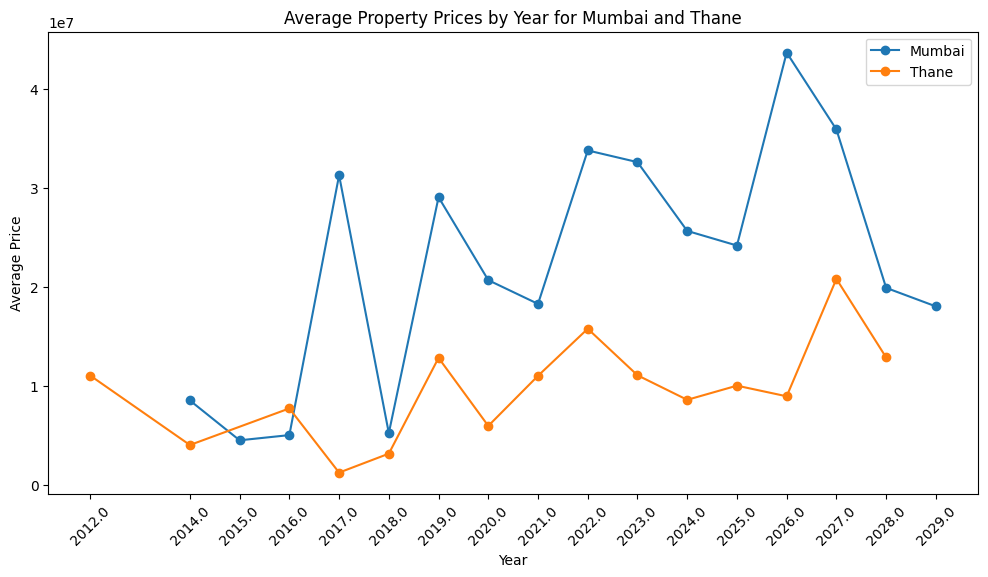

In [32]:
df = prop_cp.loc[:,['Price','City','Availability Starts From']]
df['Availability Starts From'] = pd.to_datetime(df['Availability Starts From'], format="%b '%y", errors='coerce')
df['Year'] = df['Availability Starts From'].dt.year

df_filtered = df[df['City'].isin(['Mumbai', 'Thane'])]

df_grouped = df_filtered.groupby(['Year', 'City']).agg({'Price': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
for city in ['Mumbai', 'Thane']:
    city_data = df_grouped[df_grouped['City'] == city]
    plt.plot(city_data['Year'], city_data['Price'], marker='o', label=city)

plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Property Prices by Year for Mumbai and Thane')
plt.xticks(ticks=df_grouped['Year'].unique(), labels=df_grouped['Year'].unique(), rotation=45)
plt.legend()
plt.show()

**Insights**
1. In Mumbai, The price of properties with future availability dates (2024-2028) tends to decrease as the availability date is further out, possibly reflecting the uncertainty or time value of money.
2. Thane exhibits a similar trend, but with less variability

**Overall Insights:** In Mumbai, the gap in prices between ready-to-move and under-construction properties is greater, pointing to the city's increased demand. On the other hand, the market in Thane seems to be more consistent, showing smaller price variations depending on possession status.

## Question 9

In [75]:
amenities_columns = ['Power Back Up', 'Lift', 'Rain Water Harvesting', 'Club House', 'Swimming Pool',
                     'Gymnasium', 'Park', 'Parking', 'Security', 'Water Storage',
                     'Private Terrace/Garden', 'Vaastu Compliant', 'Service/Goods Lift',
                     'Air Conditioned', 'Visitor Parking', 'Intercom Facility',
                     'Maintenance Staff', 'Waste Disposal', 'Laundry Service',
                     'Internet/Wi-Fi Connectivity', 'DTH Television Facility',
                     'RO Water System', 'Banquet Hall', 'Bar/Lounge',
                     'Cafeteria/Food Court', 'Conference Room', 'Piped Gas',
                     'Jogging and Strolling Track', 'Outdoor Tennis Courts', 'Mansion',
                     'Downtown', 'Skyline View', 'Wrap Around Balcony',
                     'Island Kitchen Layout', 'Full Glass Wall', 'House help accommodation',
                     'Concierge Services', 'Garden View', 'Marble flooring',
                     'Well Furnished', 'Modular Kitchen', 'Helipad', 'Private pool ',
                     'Private Jaccuzi', 'Mini Cinema Theatre', 'Golf Course',
                     'Infinity Swimming Pool', 'Pool with temperature control ',
                     'Sea facing', 'Skydeck', 'Earth quake resistant',
                     'Theme based Architectures', 'Health club with Steam / Jaccuzi',
                     'Large Clubhouse ', 'Large Open space', 'Fingerprint Access',
                     'Grand Entrance lobby', 'Private Garage', 'Fireplace',
                     'Wine Cellar', 'Sky Villa', 'Water Front', 'Hilltop',
                     'Smart Home', 'Barbeque space', 'Kids play area', 'Library',
                     'Puja Room', 'Study', 'Servant Room', 'Store', 'Aerobics Room',
                     'Canopy Walk', 'Coffee Lounge & Restaurants', 'Dance Studio',
                     'Event Space & Amphitheatre', 'Flower Gardens', 'Guest Accommodation',
                     'Indoor Squash & Badminton Courts', 'Kids Play Area',
                     'Kids Play Pool With Water Slides', 'Library And Business Centre',
                     'Meditation Area', 'Multipurpose Courts', 'Recreational Pool',
                     'Rentable CommuniPfty Space', 'Retail Boulevard (Retail Shops)',
                     'Cycling & Jogging Track', 'Fire Fighting Equipment',
                     'Aesthetically designed landscape garden']

In [78]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('properties.csv')

selected_columns = ['Developer', 'Price','Bathroom'] + amenities_columns
df = df[selected_columns]

df['Bathroom'] = df['Bathroom'].apply(lambda x: 1 if pd.notna(x) and x >= 1 else 0)
df = df.dropna()

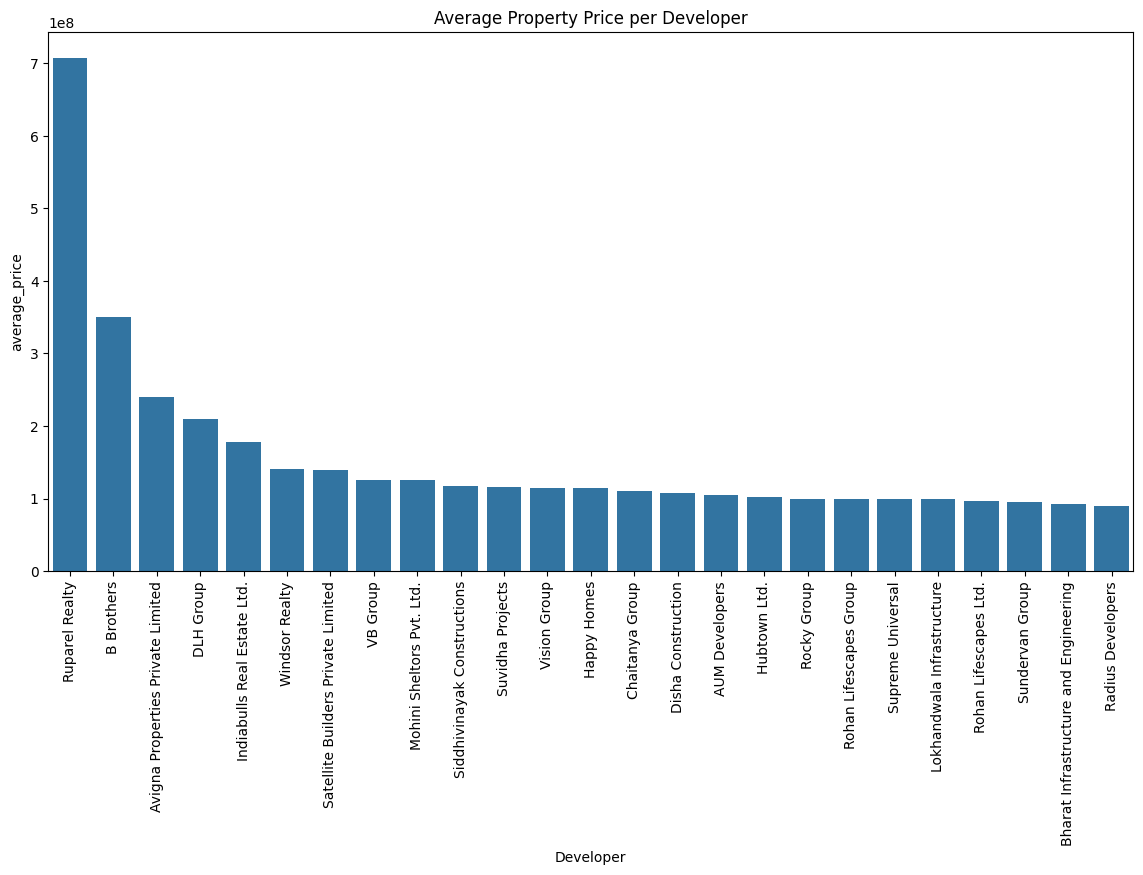

In [80]:
must_have_amenities = ['Power Back Up', 'Lift', 'Parking', 'Security', 'Water Storage', 'Intercom Facility', 'Waste Disposal','Bathroom']
good_to_have_amenities = ['Rain Water Harvesting', 'Swimming Pool', 'Gymnasium', 'Park', 'Visitor Parking', 'Internet/Wi-Fi Connectivity', 'Modular Kitchen', 'Garden View', 'Kids play area', 'Library', 'Puja Room']
high_end_amenities = ['Helipad', 'Private pool ', 'Private Jaccuzi', 'Mini Cinema Theatre', 'Golf Course', 'Infinity Swimming Pool', 'Sea facing', 'Sky Villa','Club House', 'Bar/Lounge']

for column in must_have_amenities + good_to_have_amenities + high_end_amenities:
    df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0).astype(int)

developer_avg_price = df.groupby('Developer')['Price'].mean().sort_values(ascending=False)

top_developers = developer_avg_price.head(25).index

df = df[df['Developer'].isin(top_developers)]

df['must_have_score'] = df[must_have_amenities].sum(axis=1)
df['good_to_have_score'] = df[good_to_have_amenities].sum(axis=1)
df['high_end_score'] = df[high_end_amenities].sum(axis=1)

developer_group = df.groupby('Developer').agg(
    average_price=('Price', 'mean'),
    must_have_score=('must_have_score', 'mean'),
    good_to_have_score=('good_to_have_score', 'mean'),
    high_end_score=('high_end_score', 'mean')
).reset_index()

# Developer vs. Average Property Price
plt.figure(figsize=(14, 7))
sns.barplot(x='Developer', y='average_price', data=developer_group.sort_values('average_price', ascending=False))
plt.title('Average Property Price per Developer')
plt.xticks(rotation=90)
plt.show()


**Insights**

1. Ruparel Realty stands out significantly,by having higher average property prices compared to other developers. This suggests that Ruparel Realty is associated with premium, high-end properties.
2. B Brothers and Avigna Properties both have moderately high property prices, although they are not as high as Ruparel Realty. They might target a higher-end portion of the market.
3. Other developers exhibit a moderate range of average prices, without any significant anomalies.

<Figure size 1400x1200 with 0 Axes>

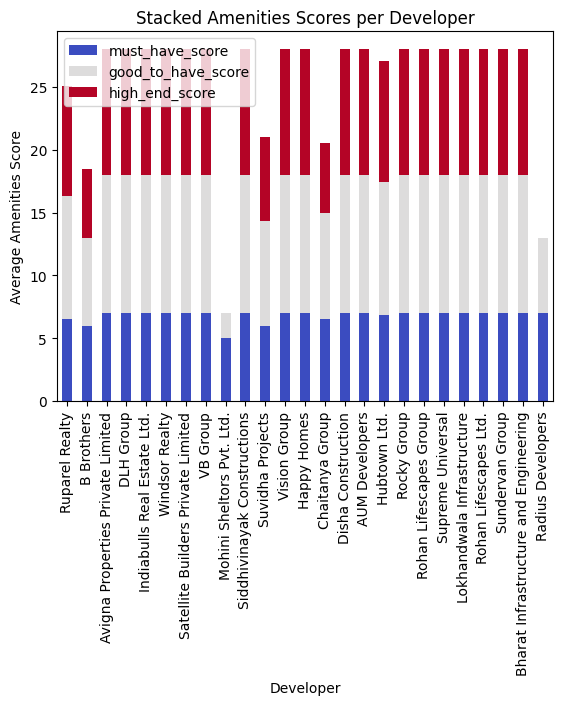

In [81]:
# Amenities Scores by Developer (Stacked Bar Chart)
developer_group_sorted = developer_group.sort_values('average_price', ascending=False)
plt.figure(figsize=(14, 12))
developer_group_sorted.set_index('Developer')[['must_have_score', 'good_to_have_score', 'high_end_score']].plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Stacked Amenities Scores per Developer')
plt.xticks(rotation=90)
plt.ylabel('Average Amenities Score')
plt.show()


**Insights**

1. **High-End Amenities (Red Bars):** Developers like Ruparel Realty, B Brothers, and Avigna Properties Private Limited score high on luxury features, correlating with their higher property prices.

2. **Must-Have and Good-to-Have Amenities:** Developers generally offer a balanced mix of essential and desirable amenities, with those charging higher prices featuring more high-end options.

3. **Mohini Shelters Pvt. Ltd. and Radius Developers:** These developers have low or no high-end amenities, suggesting a focus on budget or mid-range properties.

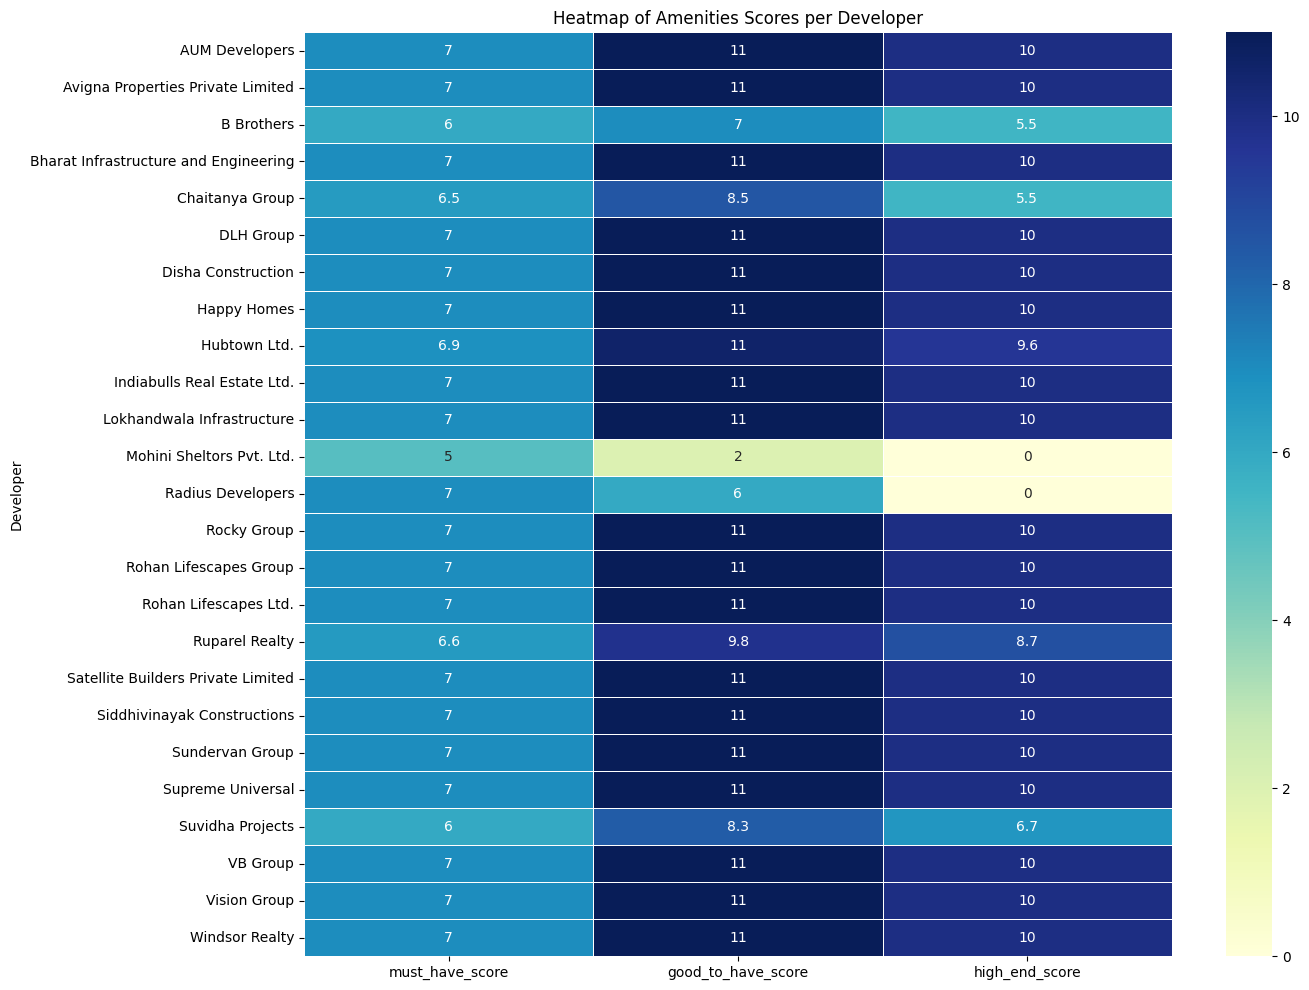

In [83]:
# Heatmap of Amenities Scores
plt.figure(figsize=(14, 12))
sns.heatmap(developer_group.set_index('Developer')[['must_have_score', 'good_to_have_score', 'high_end_score']], annot=True, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Amenities Scores per Developer')
plt.show()

**Overall Insights**

1.  Developers like Ruparel Realty, B Brothers, and Avigna Properties are associated with higher property prices and a greater focus on high-end amenities.
2. Developers like DLH Group and Indiabulls Real Estate Ltd. offer properties with a balanced mix of amenities.